In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
%matplotlib inline

In [2]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
    return (thour, tmin, round(tsec,2))
        

In [3]:
## Loading Data
df = pd.read_csv('artificial_binary_classification_data.csv')

In [4]:
# Check the data
df.head()

,Unnamed: 0,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,...,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99,Target
0,0,24.415014,9.914895,-1.906626,17.395155,0.466565,14.176581,3.508551,-1.279090,-5.173825,...,9.177737,-3.601359,-5.795938,21.203050,-7.112436,3.178673,0.470621,1.351802,1.686711,0
1,1,-32.275643,-20.674524,-10.758484,-18.221202,30.800477,2.236137,28.492182,9.246586,1.269642,...,0.849933,0.647486,11.114452,-2.616344,-11.049363,-9.889729,5.308221,3.005892,-7.497108,1
2,2,-8.105380,-4.514315,-8.413002,5.064878,-14.508363,0.960699,1.565730,3.134052,-8.145753,...,-6.368992,3.500127,-4.881639,-17.746305,8.276504,-0.873836,2.114925,6.427091,-0.713556,1
3,3,5.837858,-7.176977,7.796213,-8.826112,-3.792531,15.066911,14.650613,-3.313127,1.697081,...,-1.610845,-0.667222,-22.688014,10.894662,-4.978033,-0.392240,-2.578649,-6.244984,0.104745,1
4,4,23.663530,3.382314,0.075000,9.175336,-3.864763,-0.905172,9.214328,-0.522064,-2.344285,...,-8.659717,-0.990595,-1.584330,-1.844209,27.179920,-1.262457,-5.958853,5.499147,4.735908,0


**The data have 102 columns  
The first column is the input index, followed by 100 feature columns and the last column (Target) is the output target value**

In [5]:
df.columns

Index(['Unnamed: 0', 'C_0', 'C_1', 'C_2', 'C_3', 'C_4', 'C_5', 'C_6', 'C_7',
       'C_8',
       ...
       'C_91', 'C_92', 'C_93', 'C_94', 'C_95', 'C_96', 'C_97', 'C_98', 'C_99',
       'Target'],
      dtype='object', length=102)

In [6]:
print(f'''
Number of rows:    {df.shape[0]}
Number of columns: {df.shape[1]}''')


Number of rows:    1000
Number of columns: 102


In [7]:
## Check if there is missing values
na = df.isna().sum()
na[na >0]

Series([], dtype: int64)

**No missing value**

In [8]:
df.Target.value_counts()

1    500
0    500
Name: Target, dtype: int64

**Balanced dataset, the number of positive is the same as negative**

### Splitting data into feature (X) and output (y)

In [9]:
pd.set_option('display.max_columns', 100)

X = df.iloc[:,1:df.shape[1]-1] # values
y = df.iloc[:,-1]

### Central tendency analysis

In [10]:
X.describe()

,C_0,C_1,C_2,C_3,C_4,C_5,C_6,C_7,C_8,C_9,C_10,C_11,C_12,C_13,C_14,C_15,C_16,C_17,C_18,C_19,C_20,C_21,C_22,C_23,C_24,C_25,C_26,C_27,C_28,C_29,C_30,C_31,C_32,C_33,C_34,C_35,C_36,C_37,C_38,C_39,C_40,C_41,C_42,C_43,C_44,C_45,C_46,C_47,C_48,C_49,C_50,C_51,C_52,C_53,C_54,C_55,C_56,C_57,C_58,C_59,C_60,C_61,C_62,C_63,C_64,C_65,C_66,C_67,C_68,C_69,C_70,C_71,C_72,C_73,C_74,C_75,C_76,C_77,C_78,C_79,C_80,C_81,C_82,C_83,C_84,C_85,C_86,C_87,C_88,C_89,C_90,C_91,C_92,C_93,C_94,C_95,C_96,C_97,C_98,C_99
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.040789,-1.416258,-1.018471,-0.941594,1.869035,0.092440,0.948262,0.203186,0.246135,0.000732,0.229519,-0.528311,-1.075203,1.242994,-0.280406,-1.431468,-0.128486,1.170022,0.039913,0.194928,0.198723,0.973279,-1.959772,0.083077,-0.625582,0.229519,0.060833,1.164309,-0.278443,-1.018471,0.263808,-2.044445,0.048122,0.413458,-0.001715,-0.676309,0.056373,0.741321,-0.424648,0.561726,-0.105044,0.514306,0.262155,0.332162,0.224662,0.107724,-0.397174,0.486753,0.364517,0.236282,-0.171941,1.471748,-2.046565,0.486753,1.579664,0.869946,-0.941594,-0.460929,-1.300700,-0.287071,-0.456650,-0.491047,-0.280406,2.273520,0.869946,0.478550,-2.030620,-3.582839,3.356107,0.273269,1.170022,2.813795,-0.289159,0.094196,0.104710,-3.149295,0.073218,-0.089003,1.760016,0.264085,-1.274464,-2.819802,-0.104782,0.045703,-0.348263,2.826906,2.376024,0.018332,0.198723,-3.073368,0.486753,-0.409105,0.474541,-2.044445,-1.924411,-1.615433,-0.636683,0.004662,-0.460223,-0.105785
std,13.954612,14.874956,13.520663,14.195603,13.825030,15.449677,12.690257,3.877902,3.687145,3.787436,3.871414,3.886487,12.363279,12.661917,13.780995,13.370595,3.699908,13.455836,3.727921,3.822425,3.529770,13.457382,13.902051,3.761205,11.750555,3.871414,3.760756,3.587314,14.098814,13.520663,3.917035,13.284389,13.248282,3.725261,3.769788,3.687585,11.331466,4.054118,15.525700,14.183718,3.794982,3.800260,3.772972,11.993379,3.628096,4.026036,13.049586,13.214855,3.712157,15.073155,3.700064,14.519519,12.490698,13.214855,13.284962,12.404573,14.195603,3.747126,13.803311,3.645777,3.681285,3.594934,13.780995,11.844162,12.404573,3.895832,16.376567,13.643601,13.252455,13.659064,13.455836,13.236462,14.261110,14.771363,4.077367,13.466212,13.295258,3.912410,12.798567,3.937023,14.685620,13.889080,13.911392,3.816601,3.887177,14.008766,13.647727,13.320481,3.529770,11.766262,13.214855,3.858609,3.819512,13.284389,14.255893,13.882313,3.612809,3.881446,3.817100,3.933691
min,-40.799577,-55.712466,-44.427877,-43.163799,-45.063559,-46.784432,-35.420375,-12.227343,-10.705473,-12.525096,-13.468740,-13.409825,-42.872114,-36.449867,-54.222488,-48.042827,-12.605640,-40.056060,-12.042066,-11.675441,-11.309359,-42.353018,-48.354599,-10.839853,-38.851187,-13.468740,-11.145539,-10.507712,-56.073491,-44.427877,-12.433457,-46.595401,-37.214695,-13.149194,-11.466116,-12

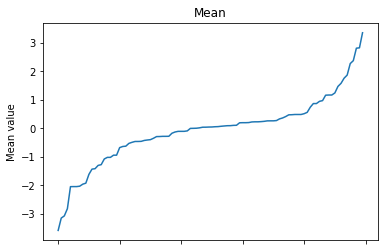

In [11]:
X.describe().loc['mean'].sort_values().plot()
plt.title('Mean')
plt.ylabel('Mean value')
plt.show()

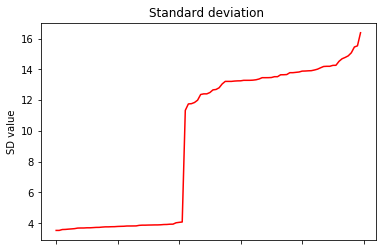

In [12]:
X.describe().loc['std'].sort_values().plot(color = 'red')
plt.title('Standard deviation ')
plt.ylabel('SD value')
plt.show()

**Seems we have two different distributions, one with higher SD and another with lower SD**

### Checking the distributions

/home/linuxbrew/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


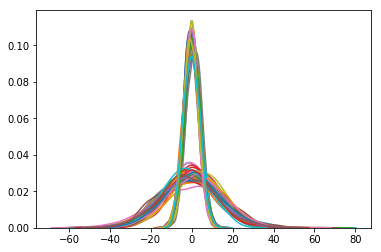

In [13]:
for col in X:
    sns.kdeplot(X[col], legend = False)
plt.show()

Indeed, there are two populations, one with higher SD and another with lower SD.  
Both populations presents a normal distribution. Therefore I will not log/root transform those values

This pattern can also be visualized using boxplot, the main advantage is that we can quickly identify which column presents higher/lower SD

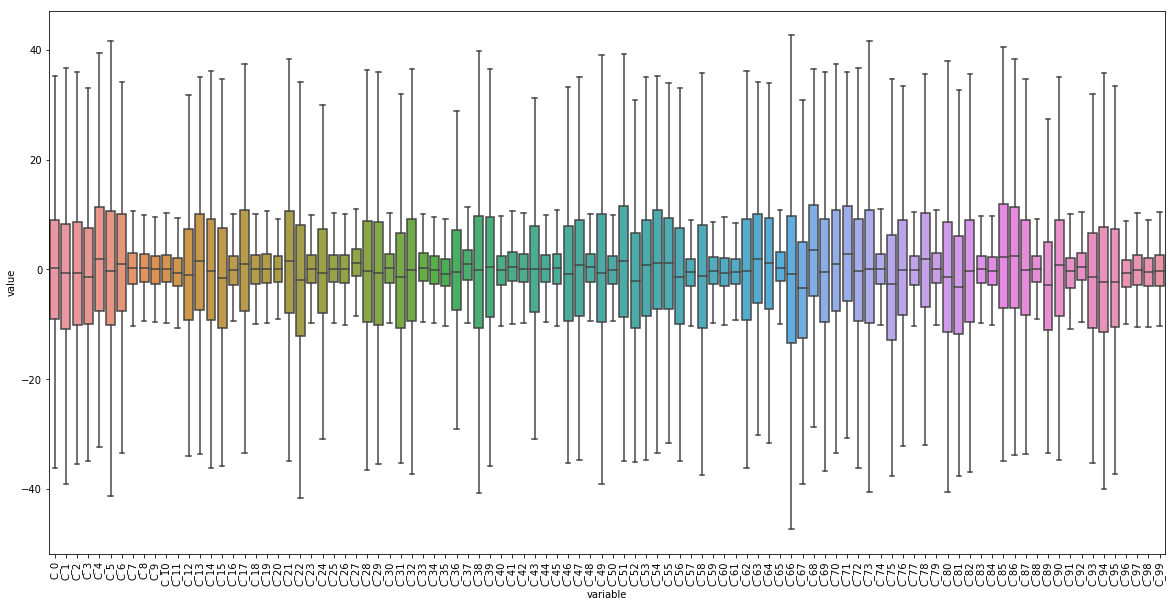

In [14]:
fig, ax = plt.subplots(1,1, figsize = (20,10))
sns.boxplot(x="variable", y="value", data=pd.melt(X), showfliers= False)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

**Since the features shows a big SD step ~4 to ~12 we can check how many columns presents high and low SD.**

In [15]:
# Creating a transposed table to fast filter values
g = X.describe().T

In [16]:
print(f'''
Number of columns with low  SD: {g[g['std'] < 8].shape[0]}
Number of columns with high SD: {g[g['std'] >= 8].shape[0]}
      ''')


Number of columns with low  SD: 42
Number of columns with high SD: 58
      


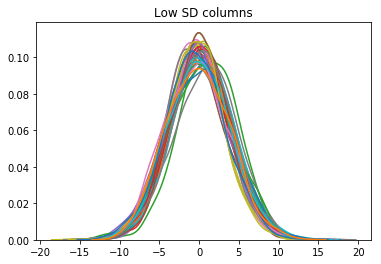

In [17]:
for col in g[g['std'] < 8].index:
    sns.kdeplot(X[col], legend = False)
plt.title('Low SD columns')
plt.show()

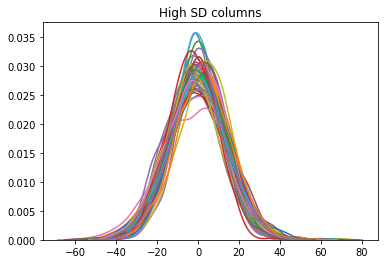

In [18]:
for col in g[g['std'] >= 10].index:
    sns.kdeplot(X[col], legend = False)
plt.title('High SD columns')
plt.show()

### Trying some random search for best values for RFC

In [20]:
def random_grid_rfc():
    '''
    Return a dict containing hyperparameters for RFC random search.
    '''
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

    # Number of features to consider at every split
    max_features = ['auto', 'sqrt']

    # Maximum number of levels in tree
    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)

    # Minimum number of samples required to split a node
    min_samples_split = [2, 5, 10]

    # Minimum number of samples required at each leaf node
    min_samples_leaf = [1, 2, 4]

    # Method of selecting samples for training each tree
    bootstrap = [True, False]

    # Create the random grid
    return {'n_estimators': n_estimators,
                   'max_features': max_features,
                   'max_depth': max_depth,
                   'min_samples_split': min_samples_split,
                   'min_samples_leaf': min_samples_leaf,
                   'bootstrap': bootstrap}


In [21]:
def random_search(X, y, params, model, n_iter = 200, threads = 3):
    '''
    Peform a random search over a given model.
    --------
    INPUT:
    X: matrix/df containing the features
    y: target values
    params: dict containing the hyperparameters to search
    n_iter: number of iterations
    threads: number of threads
    --------
    OUTPUT:
    best model parameters
    '''
    model_random = RandomizedSearchCV(estimator = model, 
                                   param_distributions = params, 
                                   n_iter = n_iter, cv = 3, verbose=2, 
                                   random_state=42, n_jobs = threads)
    model_random.fit(X, y)
    return model_random.best_estimator_


In [22]:
start_time = timer(None)
print(random_search(X, y, random_grid_rfc(), RandomForestClassifier(), n_iter = 400, threads = 20))
time_train_rand_search_raw_rfc = timer(start_time)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    2.2s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:   35.7s
[Parallel(n_jobs=20)]: Done 325 tasks      | elapsed:  1.4min
[Parallel(n_jobs=20)]: Done 608 tasks      | elapsed:  2.7min
[Parallel(n_jobs=20)]: Done 973 tasks      | elapsed:  4.2min
[Parallel(n_jobs=20)]: Done 1200 out of 1200 | elapsed:  5.2min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=90, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 Time taken: 0 hours 5 minutes and 14.47 seconds.


In [23]:
# Test how good the RFC peforms with raw data
start_time = timer(None)
rf = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=90, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
cv = KFold(n_splits=5, random_state=42, shuffle=True)
acc_rf_raw = []
score_rf_raw = []

for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score_rf_raw.append(f1_score(y_test, y_pred, average='weighted'))
    acc_rf_raw.append(metrics.accuracy_score(y_test, y_pred))
time_train_raw_rfc = timer(start_time)


 Time taken: 0 hours 0 minutes and 10.45 seconds.


In [24]:
print(f'Accuracy raw RFC: {np.array(acc_rf_raw).mean():.2f} ({np.array(acc_rf_raw).std():.2f})')
print(f'F1-score raw RFC: {np.array(score_rf_raw).mean():.2f} ({np.array(score_rf_raw).std():.2f})')

Accuracy raw RFC: 0.77 (0.02)
F1-score raw RFC: 0.77 (0.02)


### Same strategy using GBC

In [26]:
def random_grid_gbc():
    '''
    Return a dict containing hyperparameters for GBC random search.
    '''
    n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

    max_features = ['auto', 'sqrt', 'log2', None]

    learning_rate = np.arange(10e-8, 1, 10e-7)

    loss = ['deviance', 'exponential']

    min_samples_split = [2, 5, 10]

    min_samples_leaf = [1,2,4]

    max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
    max_depth.append(None)

    # Create the random grid
    return {'n_estimators': n_estimators,
                   'max_features': max_features,

                'learning_rate':learning_rate,
                  'loss': loss,
                  #'criterion':criterion,
                  'min_samples_split':min_samples_split,
                  'min_samples_leaf':min_samples_leaf,
                  'max_depth':max_depth}



In [27]:
start_time = timer(None)
print(random_search(X, y, random_grid_gbc(), GradientBoostingClassifier(), n_iter = 400, threads = 20))
time_train_rand_search_raw_gbc = timer(start_time)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:    4.8s
[Parallel(n_jobs=20)]: Done 325 tasks      | elapsed:   19.0s
[Parallel(n_jobs=20)]: Done 608 tasks      | elapsed:   38.4s
[Parallel(n_jobs=20)]: Done 973 tasks      | elapsed:   59.2s
[Parallel(n_jobs=20)]: Done 1200 out of 1200 | elapsed:  1.8min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0037451000000000003, loss='deviance',
              max_depth=90, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

 Time taken: 0 hours 1 minutes and 50.72 seconds.


In [28]:
start_time = timer(None)
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0037451000000000003, loss='deviance',
              max_depth=90, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
cv = KFold(n_splits=5, random_state=42, shuffle=True)
score_gbc_raw = []
acc_gbc_raw = []

for train_index, test_index in cv.split(X):

    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    gbc.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score_gbc_raw.append(f1_score(y_test, y_pred, average='weighted'))
    acc_gbc_raw.append(metrics.accuracy_score(y_test, y_pred))
time_train_raw_gbc = timer(start_time)


 Time taken: 0 hours 0 minutes and 4.74 seconds.


In [29]:
print(f'Accuracy raw GBC: {np.array(acc_gbc_raw).mean():.2f} ({np.array(acc_gbc_raw).std():.2f})')
print(f'F1-score raw GBC: {np.array(score_gbc_raw).mean():.2f} ({np.array(score_gbc_raw).std():.2f})')

Accuracy raw GBC: 0.95 (0.10)
F1-score raw GBC: 0.95 (0.10)


**Using raw values the GBC (Acc: 0.95, f1-score: 0.95) outperformed RFC (Acc: 0.77, f1-score: 0.77)**

### Boruta algorithm
**To identify relevant features I decided to use the boruta algorithm**

In [30]:
from boruta import BorutaPy

# Reusing the best RFC parameter to find most relevant features using boruta algorithm
# https://arxiv.org/pdf/1106.5112.pdf

start_time = timer(None)
rfc = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=90, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=5,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
boruta_selector_rfc = BorutaPy(rfc, verbose=2)
boruta_selector_rfc.fit(X.values, y.values)
time_boruta_rfc = timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	30
Tentative: 	38
Rejected: 	32
Iteration: 	9 / 100
Confirmed: 	30
Tentative: 	38
Rejected: 	32
Iteration: 	10 / 100
Confirmed: 	30
Tentative: 	38
Rejected: 	32
Iteration: 	11 / 100
Confirmed: 	30
Tentative: 	38
Rejected: 	32
Iteration: 	12 / 100
Confirmed: 	30
Tentative: 	38
Rejected: 	32
Iteration: 	13 / 100
Confirmed: 	30
Tentative: 	38
Rejected: 	32
Iteration: 	14 / 100
Confirmed: 	30
Tentative: 	38
Rejected: 	32
Iteration: 	15 / 100
Confirmed: 	30
Tentative: 	37
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	31
Tenta

In [31]:
# number of selected features
print ('Number of selected features (rank 1):', boruta_selector_rfc.n_features_)

feature_df = pd.DataFrame(X.columns.tolist(), columns=['features'])
feature_df['rank']=boruta_selector_rfc.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)
print ('Top %d features:' % boruta_selector_rfc.n_features_)
print (feature_df.head(boruta_selector_rfc.n_features_))
#feature_df.to_csv('boruta-feature-ranking.csv', index=False)

# check ranking of features
print ('Feature ranking:')
print (boruta_selector_rfc.ranking_)

Number of selected features (rank 1): 53
Top 53 features:
   features  rank
0       C_0     1
1      C_61     1
2      C_59     1
3      C_58     1
4      C_56     1
5      C_55     1
6      C_54     1
7      C_62     1
8      C_52     1
9      C_50     1
10     C_48     1
11     C_44     1
12     C_42     1
13     C_41     1
14     C_40     1
15     C_51     1
16     C_64     1
17     C_66     1
18     C_67     1
19     C_97     1
20     C_96     1
21     C_95     1
22     C_93     1
23     C_92     1
24     C_91     1
25     C_89     1
26     C_86     1
27     C_85     1
28     C_83     1
29     C_81     1
30     C_76     1
31     C_72     1
32     C_69     1
33     C_68     1
34     C_37     1
35     C_36     1
36     C_49     1
37     C_15     1
38     C_18     1
39     C_19     1
40     C_21     1
41     C_23     1
42     C_14     1
43      C_9     1
44      C_8     1
45     C_26     1
46     C_35     1
47      C_7     1
48      C_4     1
49      C_3     1
50     C_31     1
51    

In [32]:
# Number of features with rank 1 or 2
feature_df[feature_df['rank'].isin([1,2])].shape[0]

63

In [33]:
# Filtering features with ranking 1 or 2
X_rfc_filtered = X[feature_df[feature_df['rank'].isin([1,2])].features]

In [34]:
start_time = timer(None)
print(random_search(X_rfc_filtered, y, random_grid_rfc(), RandomForestClassifier(), n_iter = 400, threads = 20))
time_train_rand_search_filtered_rfc = timer(start_time)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.1s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:   27.4s
[Parallel(n_jobs=20)]: Done 325 tasks      | elapsed:  1.1min
[Parallel(n_jobs=20)]: Done 608 tasks      | elapsed:  2.0min
[Parallel(n_jobs=20)]: Done 973 tasks      | elapsed:  3.2min
[Parallel(n_jobs=20)]: Done 1200 out of 1200 | elapsed:  4.0min finished


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

 Time taken: 0 hours 4 minutes and 3.01 seconds.


In [35]:
start_time = timer(None)
rfc_boruta = RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=100, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=5,
            oob_score=False, random_state=42, verbose=0,
            warm_start=False)
cv = KFold(n_splits=5, random_state=42, shuffle=False)

acc_rf_filtered = []
score_rf_filtered = []
X_filtered = X[feature_df[feature_df['rank'].isin([1,2])].features]
for train_index, test_index in cv.split(X_filtered):

    X_train, X_test, y_train, y_test = X_rfc_filtered.loc[train_index], X_rfc_filtered.loc[test_index], y.loc[train_index], y.loc[test_index]
    rfc_boruta.fit(X_train, y_train)
    y_pred = rfc_boruta.predict(X_test)

    score_rf_filtered.append(f1_score(y_test, y_pred, average='weighted'))
    acc_rf_filtered.append(metrics.accuracy_score(y_test, y_pred))
time_train_filtered_rfc = timer(start_time)


 Time taken: 0 hours 0 minutes and 7.46 seconds.


In [36]:
print(f'Accuracy filtered RFC: {np.array(acc_rf_filtered).mean():.2f} ({np.array(acc_rf_filtered).std():.2f})')
print(f'F1-score filtered RFC: {np.array(score_rf_filtered).mean():.2f} ({np.array(score_rf_filtered).std():.2f})')

Accuracy filtered RFC: 0.77 (0.02)
F1-score filtered RFC: 0.77 (0.02)


In [42]:
## Boruta GBC

In [37]:
from boruta import BorutaPy

start_time = timer(None)
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.0037451000000000003, loss='deviance',
              max_depth=90, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
boruta_selector_gbc = BorutaPy(gbc, verbose=2)
#start_time = timer(None)
boruta_selector_gbc.fit(X.values, y.values)
#timer(start_time)
time_boruta_gbc = timer(start_time)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	22
Tentative: 	46
Rejected: 	32
Iteration: 	9 / 100
Confirmed: 	22
Tentative: 	46
Rejected: 	32
Iteration: 	10 / 100
Confirmed: 	22
Tentative: 	46
Rejected: 	32
Iteration: 	11 / 100
Confirmed: 	22
Tentative: 	46
Rejected: 	32
Iteration: 	12 / 100
Confirmed: 	27
Tentative: 	41
Rejected: 	32
Iteration: 	13 / 100
Confirmed: 	27
Tentative: 	41
Rejected: 	32
Iteration: 	14 / 100
Confirmed: 	27
Tentative: 	39
Rejected: 	34
Iteration: 	15 / 100
Confirmed: 	27
Tentative: 	39
Rejected: 	34
Iteration: 	16 / 100
Confirmed: 	33
Tenta

In [38]:
# number of selected features
print ('Number of selected features:')
print (boruta_selector_gbc.n_features_)

feature_df['rank_gbc']=boruta_selector_gbc.ranking_
feature_df = feature_df.sort_values('rank_gbc', ascending=True).reset_index(drop=True)
print ('Top %d features:' % boruta_selector_gbc.n_features_)
print (feature_df.head(boruta_selector_gbc.n_features_))
#feature_df.to_csv('boruta-feature-ranking.csv', index=False)

# check ranking of features
print ('Feature ranking:')
print (boruta_selector_gbc.ranking_)

Number of selected features:
44
Top 44 features:
   features  rank  rank_gbc
0       C_0     1         1
1      C_36     1         1
2      C_49     1         1
3      C_15     1         1
4      C_21     1         1
5      C_23     1         1
6       C_8     1         1
7       C_4     1         1
8      C_31     1         1
9      C_32     1         1
10     C_12     2         1
11     C_60     2         1
12     C_77     2         1
13     C_78     2         1
14     C_10     2         1
15     C_27     4         1
16     C_73     6         1
17     C_25     7         1
18     C_99     9         1
19     C_34    16         1
20      C_2    21         1
21     C_39    23         1
22     C_16    24         1
23     C_28    26         1
24     C_70    29         1
25     C_90    31         1
26      C_6    32         1
27      C_1    32         1
28     C_47    35         1
29     C_82    36         1
30     C_68     1         1
31     C_69     1         1
32      C_3     1         1

In [40]:
print('Features in RFC or GBC', feature_df[(feature_df['rank'].isin([1,2])) | ((feature_df['rank_gbc'].isin([1,2])))].shape[0])
print('Features in RFC and GBC', feature_df[(feature_df['rank'].isin([1,2])) & ((feature_df['rank_gbc'].isin([1,2])))].shape[0])
print('Features in GBC only', feature_df[((feature_df['rank_gbc'].isin([1,2])))].shape[0])
print('Features in RFC only', feature_df[((feature_df['rank'].isin([1,2])))].shape[0])

Features in RFC or GBC 84
Features in RFC and GBC 36
Features in GBC only 57
Features in RFC only 63


In [41]:
X_gbc_filtered = X[feature_df[((feature_df['rank_gbc'].isin([1,2])))].features]

In [42]:
start_time = timer(None)
print(random_search(X_gbc_filtered, y, random_grid_gbc(), GradientBoostingClassifier(), n_iter = 400, threads = 20))
time_train_rand_search_filtered_gbc = timer(start_time)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=20)]: Done 122 tasks      | elapsed:    5.1s
[Parallel(n_jobs=20)]: Done 325 tasks      | elapsed:   16.8s
[Parallel(n_jobs=20)]: Done 608 tasks      | elapsed:   30.6s
[Parallel(n_jobs=20)]: Done 973 tasks      | elapsed:   46.5s
[Parallel(n_jobs=20)]: Done 1200 out of 1200 | elapsed:  1.3min finished


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.031571100000000005, loss='exponential',
              max_depth=100, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1400,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

 Time taken: 0 hours 1 minutes and 21.49 seconds.


In [43]:
start_time = timer(None)
gbc = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.031571100000000005, loss='exponential',
              max_depth=100, max_features='log2', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=2, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1400,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)
cv = KFold(n_splits=5, random_state=42, shuffle=True)

acc_gbc_filtered = []
score_gbc_filtered = []
for train_index, test_index in cv.split(X_gbc_filtered):

    X_train, X_test, y_train, y_test = X.loc[train_index], X.loc[test_index], y.loc[train_index], y.loc[test_index]
    gbc.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score_gbc_filtered.append(f1_score(y_test, y_pred, average='weighted'))
    acc_gbc_filtered.append(metrics.accuracy_score(y_test, y_pred))
time_train_filtered_gbc = timer(start_time)


 Time taken: 0 hours 0 minutes and 12.38 seconds.


In [44]:
print(f'Accuracy filtered GBC: {np.array(acc_gbc_filtered).mean():.2f} ({np.array(acc_gbc_filtered).std():.2f})')
print(f'F1-score filtered GBC: {np.array(score_gbc_filtered).mean():.2f} ({np.array(score_gbc_filtered).std():.2f})')

Accuracy filtered GBC: 0.95 (0.10)
F1-score filtered GBC: 0.95 (0.10)


In [ ]:
print(time_train_rand_search_raw_rfc)
print(time_train_raw_rfc)
print(time_train_rand_search_raw_gbc)
print(time_train_raw_gbc)
print(time_train_rand_search_filtered_rfc)
print(time_train_filtered_rfc)
print(time_train_rand_search_filtered_gbc)
print(time_train_filtered_gbc)
print(time_boruta_rfc)
print(time_boruta_gbc)

In [45]:
print(f'Total time to random search parameters of RFC using raw data: {time_train_rand_search_raw_rfc[1]} minutes and {time_train_rand_search_raw_rfc[2]} seconds')
print(f'Total time to train RFC using raw data: {time_train_raw_rfc[1]} minutes and {time_train_raw_rfc[2]} seconds')

print(f'Total time to random search parameters of GBC using raw data: {time_train_rand_search_raw_gbc[1]} minutes and {time_train_rand_search_raw_gbc[2]} seconds')
print(f'Total time to train GBC using raw data: {time_train_rand_search_raw_gbc[1]} minutes and {time_train_rand_search_raw_gbc[2]} seconds')

print(f'Total time to random search parameters of RFC using filtered data: {time_train_rand_search_filtered_rfc[1]} minutes and {time_train_rand_search_filtered_rfc[2]} seconds')
print(f'Total time to train RFC using raw filtered: {time_train_filtered_rfc[1]} minutes and {time_train_filtered_rfc[2]} seconds')

print(f'Total time to random search parameters of GBC using filtered data: {time_train_rand_search_filtered_gbc[1]} minutes and {time_train_rand_search_filtered_gbc[2]} seconds')
print(f'Total time to train GBC using filtered data: {time_train_filtered_gbc[1]} minutes and {time_train_filtered_gbc[2]} seconds')


print(f'Total time to select most relevant features using boruta algorithm and RFC: {time_boruta_rfc[1]} minutes and {time_boruta_rfc[2]} seconds')
print(f'Total time to select most relevant features using boruta algorithm and GBC: {time_boruta_gbc[1]} minutes and {time_boruta_gbc[2]} seconds')


Total time to random search parameters of RFC using raw data: 5.0 minutes and 14.47 seconds
Total time to train RFC using raw data: 0.0 minutes and 10.45 seconds
Total time to random search parameters of GBC using raw data: 1.0 minutes and 50.72 seconds
Total time to train GBC using raw data: 1.0 minutes and 50.72 seconds
Total time to random search parameters of RFC using filtered data: 4.0 minutes and 3.01 seconds
Total time to train RFC using raw filtered: 0.0 minutes and 7.46 seconds
Total time to random search parameters of GBC using filtered data: 1.0 minutes and 21.49 seconds
Total time to train GBC using filtered data: 0.0 minutes and 12.38 seconds
Total time to select most relevant features using boruta algorithm and RFC: 3.0 minutes and 15.87 seconds
Total time to select most relevant features using boruta algorithm and GBC: 10.0 minutes and 13.43 seconds


In [65]:
_scores = pd.DataFrame({
                'Model':['RFC', 'RFC', 'GBC', 'GBC'],
                'Metric':['accuracy', 'f1-score', 'accuracy', 'f1-score'],
                'Raw':[f'{np.array(acc_rf_raw).mean()*100:.2f}',
                       f'{np.array(score_rf_raw).mean()*100:.2f}',
                       f'{np.array(acc_gbc_raw).mean()*100:.2f}',
                       f'{np.array(score_gbc_raw).mean()*100:.2f}'],

                'Filtered':[f'{np.array(acc_rf_filtered).mean()*100:.2f}',
                            f'{np.array(score_rf_filtered).mean()*100:.2f}',
                            f'{np.array(acc_gbc_filtered).mean()*100:.2f}',
                            f'{np.array(score_gbc_filtered).mean()*100:.2f}']
                })

In [66]:
print('Accuracy using RFC and GBC with raw and filtered data')
print(tabulate(_scores, headers='keys', tablefmt='psql'))


Accuracy using RFC and GBC with raw and filtered data
+----+---------+----------+-------+------------+
|    | Model   | Metric   |   Raw |   Filtered |
|----+---------+----------+-------+------------|
|  0 | RFC     | accuracy | 76.8  |      77.3  |
|  1 | RFC     | f1-score | 76.79 |      77.31 |
|  2 | GBC     | accuracy | 95.2  |      95.2  |
|  3 | GBC     | f1-score | 95.2  |      95.2  |
+----+---------+----------+-------+------------+


(63,)

In [76]:
from tabulate import tabulate
print('Selected features for RFC')
print(tabulate(feature_df[feature_df['rank'].isin([1,2])].features.reset_index(drop = True).to_frame(), headers='keys', tablefmt='psql'))


Selected features for RFC
+----+------------+
|    | features   |
|----+------------|
|  0 | C_0        |
|  1 | C_36       |
|  2 | C_49       |
|  3 | C_15       |
|  4 | C_21       |
|  5 | C_23       |
|  6 | C_8        |
|  7 | C_4        |
|  8 | C_31       |
|  9 | C_32       |
| 10 | C_12       |
| 11 | C_60       |
| 12 | C_77       |
| 13 | C_78       |
| 14 | C_10       |
| 15 | C_68       |
| 16 | C_69       |
| 17 | C_3        |
| 18 | C_40       |
| 19 | C_72       |
| 20 | C_51       |
| 21 | C_67       |
| 22 | C_52       |
| 23 | C_95       |
| 24 | C_92       |
| 25 | C_62       |
| 26 | C_56       |
| 27 | C_86       |
| 28 | C_58       |
| 29 | C_89       |
| 30 | C_80       |
| 31 | C_38       |
| 32 | C_33       |
| 33 | C_14       |
| 34 | C_93       |
| 35 | C_18       |
| 36 | C_91       |
| 37 | C_50       |
| 38 | C_41       |
| 39 | C_97       |
| 40 | C_7        |
| 41 | C_48       |
| 42 | C_42       |
| 43 | C_83       |
| 44 | C_55       |
| 45 | C_59   

In [77]:
from tabulate import tabulate
print('Selected features for GBC')
print(tabulate(feature_df[((feature_df['rank_gbc'].isin([1,2])))].features.reset_index(drop = True).to_frame(), headers='keys', tablefmt='psql'))


Selected features for GBC
+----+------------+
|    | features   |
|----+------------|
|  0 | C_0        |
|  1 | C_36       |
|  2 | C_49       |
|  3 | C_15       |
|  4 | C_21       |
|  5 | C_23       |
|  6 | C_8        |
|  7 | C_4        |
|  8 | C_31       |
|  9 | C_32       |
| 10 | C_12       |
| 11 | C_60       |
| 12 | C_77       |
| 13 | C_78       |
| 14 | C_10       |
| 15 | C_27       |
| 16 | C_73       |
| 17 | C_25       |
| 18 | C_99       |
| 19 | C_34       |
| 20 | C_2        |
| 21 | C_39       |
| 22 | C_16       |
| 23 | C_28       |
| 24 | C_70       |
| 25 | C_90       |
| 26 | C_6        |
| 27 | C_1        |
| 28 | C_47       |
| 29 | C_82       |
| 30 | C_68       |
| 31 | C_69       |
| 32 | C_3        |
| 33 | C_40       |
| 34 | C_72       |
| 35 | C_51       |
| 36 | C_67       |
| 37 | C_52       |
| 38 | C_95       |
| 39 | C_92       |
| 40 | C_62       |
| 41 | C_56       |
| 42 | C_86       |
| 43 | C_58       |
| 44 | C_89       |
| 45 | C_94   

 ### Final considerations

I decided to use two different strategies, a Random Forest Classifier (RFC) and a Gradient Boosting Classifier (GBC).

It is well known that the GBCs usually presents a better performance as compared to RFCs. Although the GBCs presents some downsides as compared to RFCs, including:

-	RF are harder to overfit than GBM.
-	There are more hyperparameters to optimize in the GBCs as compared to RFCs, therefore GBCs are harder to tune than RFCs.
-	It is very hard to parallelize the GBCs while the RFC are easier

Despite of those drawbacks, I decided to optimize both and see how GBCs and RFCs would perform with the provided data.

To optimize both classifies I used a random search using several hyperparameters to fine tune the model and get a result close to the best possible, even though it could be not the best is very close to the best model. Using this strategy, it was clear that the GBCs outperformed the RFCs, while the RFCs presented an overall accuracy of 76.8% the GBC showed an accuracy of 95.2% using the raw data.

To eliminate irrelevant features from our dataset, I decided to use the Boruta algorithm. There are three general classes of feature selection algorithms: filters, wrappers and embedded algorithms. Filters are based on the measure of importance which is independent of a classification method, this algorithm includes the examination of correlation between features and information gain. Those filters are applied before the classification, and even though those algorithms are easy to use, they are unable to detect complex relationships between features. Embedded algorithm on the other hand, perform feature selection during the classifier training, optimizing the attribute set used to achieve the best accuracy. The wrapper method, which includes Boruta algorithm, rely on the feature relevance information obtained from some classification method and therefore may use a deeper insight than the filter algorithm. 

Using this wrapper algorithm it was possible to filter 37 irrelevant features for the RFCs (selecting 63 features, see table above) and removed 53 irrelevant features for GBCs. Using the filtered data, after removing the corresponding irrelevant columns from the data, the new RFC and GBC classifiers, the accuracy were almost the same as the raw data, 77.3% RFC and 95.2% GBC, but the total time to train the GBC model reduced 90% and for the RFC I got a reduction of 30% of the total time. It is important to reduce the number of features since using less data is possible to deliver a fast response in the future predictions without loosing the acuracy of the result. 

An interesting follow-up would be to investigate which features were selected in both models (intersection, total number of features 36), and what is the effect of which one in the model, using this strategy it is will be possible to improve this particular section to other teams (the responsible team can create a project to improve this particular data).

